In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve



In [2]:
# load the dataset
data = pd.read_csv('/content/generated_Sneh_dataset.csv')
data.head()

,Fraud,PolicyHolderNumber,VehicleNumber,InsuranceNoteSuspeciousLevel,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,ClaimAmount,CarCompany,...,PolicyHolderIncome,LivingStatus,FuelType,SteeringType,IncidentHourOfDay,witness,ChargedForSpeedingViolation,DrivingExperience,PastAccidents,PoliceReportFilled
0,No,5717,5835,3,Doctor,No,Glass Damage,40-50,1229.68,Honda,...,352314,Married,Petrol,Power,9,4,No,5-10 years,0,No
1,No,9386,8689,4,Teacher,Yes,Accidents,50-60,9298.26,Toyota,...,452377,Single,Electric,Manual,17,0,No,20+ years,1,No
2,No,2408,8321,5,Electrician,No,Vandalism,30-40,2939.69,BMW,...,821368,Single,Electric,Electric,24,3,Yes,5-10 years,2,No
3,No,5153,2334,5,Salesperson,No,Glass Damage,20-30,6783.45,Other,...,566697,Married,Diesel,Power,3,0,No,5-10 years,4,No
4,Yes,7811,2258,4,Doctor,No,Accidents,30-40,6298.16,Audi,...,858536,Single,Electric,Electric,9,2,Yes,5-10 years,4,No


In [3]:
data.dtypes

Fraud                             object
PolicyHolderNumber                 int64
VehicleNumber                      int64
InsuranceNoteSuspeciousLevel       int64
PolicyHolderOccupation            object
PolicyRecentlyTakenOrUpgraded     object
ClaimCause                        object
AgeGroup                          object
ClaimAmount                      float64
CarCompany                        object
Sex                               object
CarType                           object
ClaimsFrequency                    int64
SafetyRating                       int64
PolicyHolderIncome                 int64
LivingStatus                      object
FuelType                          object
SteeringType                      object
IncidentHourOfDay                  int64
witness                            int64
ChargedForSpeedingViolation       object
DrivingExperience                 object
PastAccidents                      int64
PoliceReportFilled                object
dtype: object

In [4]:
cols_to_drop = ['PolicyHolderNumber','VehicleNumber','CarCompany','CarType','FuelType','SteeringType']

In [5]:
data.drop(columns=cols_to_drop,inplace=True)

In [6]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [7]:
categorical_cols = [col for col in data.columns if data[col].dtypes == 'O']
categorical_cols

['Fraud',
 'PolicyHolderOccupation',
 'PolicyRecentlyTakenOrUpgraded',
 'ClaimCause',
 'AgeGroup',
 'Sex',
 'LivingStatus',
 'ChargedForSpeedingViolation',
 'DrivingExperience',
 'PoliceReportFilled']

In [8]:
label_encoder = LabelEncoder()
X = data[categorical_cols].apply(label_encoder.fit_transform)

In [9]:
data1=data.drop(["Fraud","PolicyHolderOccupation","PolicyRecentlyTakenOrUpgraded","ClaimCause","AgeGroup","Sex","LivingStatus", "ChargedForSpeedingViolation", "DrivingExperience", "PoliceReportFilled"], axis=1)

In [10]:
fraud=pd.concat([X,data1],axis=1)
fraud

,Fraud,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,Sex,LivingStatus,ChargedForSpeedingViolation,DrivingExperience,PoliceReportFilled,InsuranceNoteSuspeciousLevel,ClaimAmount,ClaimsFrequency,SafetyRating,PolicyHolderIncome,IncidentHourOfDay,witness,PastAccidents
0,0,2,0,6,2,1,0,0,3,0,3,1229.68,0,2,352314,9,4,0
1,0,13,1,0,3,0,1,0,2,0,4,9298.26,2,1,452377,17,0,1
2,0,4,0,12,1,1,1,1,3,0,5,2939.69,1,0,821368,24,3,2
3,0,10,0,6,0,0,0,0,3,0,5,6783.45,0,0,566697,3,0,4
4,1,2,0,0,1,1,1,1,3,0,4,6298.16,2,1,858536,9,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923851,0,5,0,1,3,1,1,1,3,0,0,3945.80,0,1,264909,22,2,1
923852,0,5,1,8,0,1,0,0,2,0,3,6436.06,1,1,163404,3,0,1
923853,0,5,0,9,0,1,1,1,3,0,4,1906.04,1,2,422508,16,0,5
923854,0,6,0,12,3,0,1,1,3,0,5,6882.08,1,0,203412,1,2,0


In [11]:
# Separate features and target
X = fraud.drop(columns=['Fraud'])
y = fraud['Fraud']

In [12]:
#Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_)

[0.0670675  0.00760898 0.05578561 0.04700869 0.01599174 0.01311337
 0.01690416 0.03859172 0.01062799 0.04520941 0.12713615 0.03373795
 0.26025779 0.07924299 0.07151256 0.05570579 0.0544976 ]


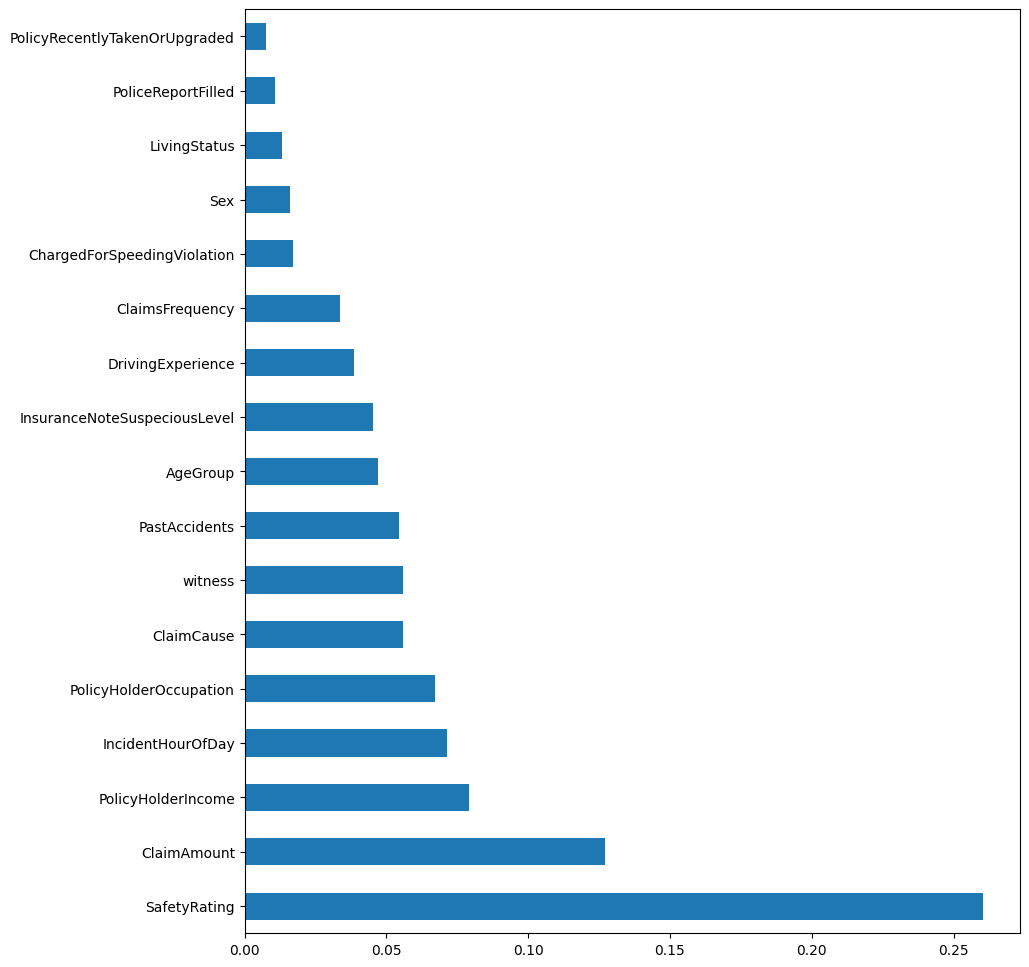

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [15]:
X=X.drop(['PolicyRecentlyTakenOrUpgraded', 'PoliceReportFilled', 'LivingStatus', 'Sex', 'ChargedForSpeedingViolation'],axis=1)

In [16]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create preprocessing step for PCA
pca_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('pca', pca_transformer, X_train.columns)  # Add the PCA step here
    ])

# Create pipeline with undersampling, oversampling, SMOTE, and model
# Choose one of the resampling techniques and comment out the others
# 1. Undersampling
# sampler = RandomUnderSampler(sampling_strategy=0.5)

# 2. SMOTE
# sampler = SMOTE(sampling_strategy=0.5)

# 3. Oversampling
sampler = RandomOverSampler(sampling_strategy=0.7)

Accuracy: 0.8318089320892776
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90    155256
           1       0.48      0.57      0.52     29516

    accuracy                           0.83    184772
   macro avg       0.70      0.72      0.71    184772
weighted avg       0.84      0.83      0.84    184772



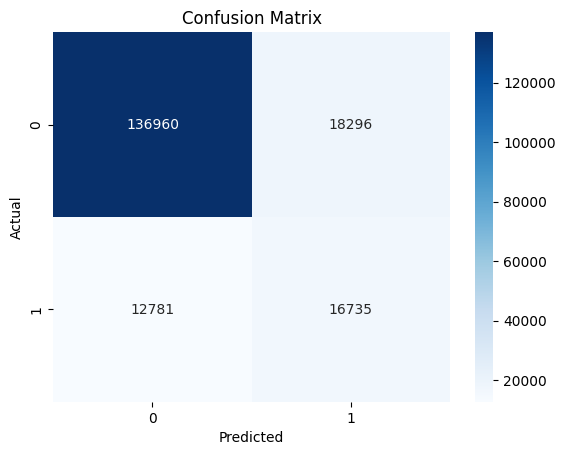

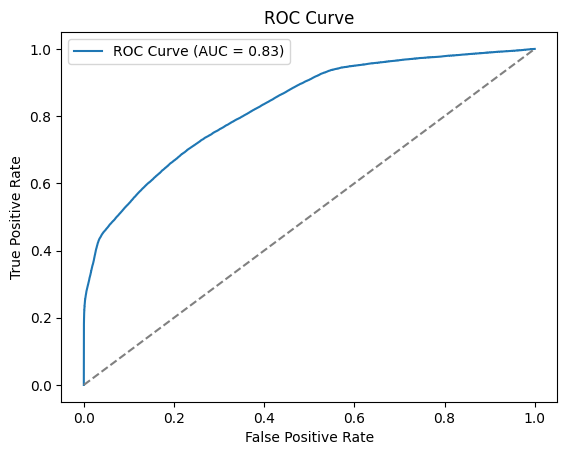

In [17]:
# Define the XGBoost model with randomly chosen parameters
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.5, max_depth=6,
                              min_child_weight=3, gamma=0.2, subsample=0.7,
                              colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1,
                              random_state=42)

# Create the pipeline
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('model', xgb_model)
])

# Train the pipeline
xgboost_pipeline.fit(X_train, y_train)

# Make predictions
predictions = xgboost_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score and Curve
y_probs = xgboost_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [18]:
import pickle

# Save the trained pipeline (including the XGBoost model) as a pickle file
Fraud_detection_model = 'xgboost_fraud_detection_model.pkl'
with open(Fraud_detection_model, 'wb') as file:
    pickle.dump(xgboost_pipeline, file)

print("Model saved to:", Fraud_detection_model)

Model saved to: xgboost_fraud_detection_model.pkl


In [19]:
# from sklearn.ensemble import RandomForestClassifier

# # Define the Random Forest model with manually selected hyperparameters
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# # Create the pipeline
# rf_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', rf_model)
# ])

# # Train the pipeline
# rf_pipeline.fit(X_train, y_train)

# # Make predictions
# rf_predictions = rf_pipeline.predict(X_test)

# # Evaluate the model
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print("Random Forest Accuracy:", rf_accuracy)
# print("Classification Report:\n", classification_report(y_test, rf_predictions))

# # Confusion Matrix
# cm = confusion_matrix(y_test, rf_predictions)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # ROC-AUC Score and Curve
# y_probs = rf_pipeline.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_probs)
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Define the Random Forest model with manually selected hyperparameters
# rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5,
#                                   min_samples_leaf=2, max_features='sqrt', random_state=42)

# # Create the pipeline
# rf_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', rf_model)
# ])

# # Train the pipeline
# rf_pipeline.fit(X_train, y_train)

# # Make predictions
# rf_predictions = rf_pipeline.predict(X_test)

# # Evaluate the model
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print("Random Forest Accuracy:", rf_accuracy)
# print("Classification Report:\n", classification_report(y_test, rf_predictions))

# # Confusion Matrix
# cm = confusion_matrix(y_test, rf_predictions)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # ROC-AUC Score and Curve
# y_probs = rf_pipeline.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_probs)
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Define the Gradient Boosting model with manually selected hyperparameters
# gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5,
#                                       min_samples_split=2, min_samples_leaf=1,
#                                       subsample=0.9, random_state=42)

# # Create the pipeline
# gb_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', gb_model)
# ])

# # Train the pipeline
# gb_pipeline.fit(X_train, y_train)

# # Make predictions
# gb_predictions = gb_pipeline.predict(X_test)

# # Evaluate the model
# gb_accuracy = accuracy_score(y_test, gb_predictions)
# print("Gradient Boosting Accuracy:", gb_accuracy)
# print("Classification Report:\n", classification_report(y_test, gb_predictions))

# # Confusion Matrix
# cm = confusion_matrix(y_test, gb_predictions)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # ROC-AUC Score and Curve
# y_probs = gb_pipeline.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_probs)
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


In [ ]:
# model1 = LogisticRegression()
# pipeline1 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model1)
# ])

# # Train the pipeline
# pipeline1.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline1.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))

In [ ]:
# model2 = RandomForestClassifier(n_estimators=50, random_state=42)
# pipeline2 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model2)
# ])

# # Train the pipeline
# pipeline2.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline2.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))


In [ ]:
# model3 = xgb.XGBClassifier(n_estimators=50, random_state=42)
# pipeline3 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model3)
# ])

# # Train the pipeline
# pipeline3.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline3.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the model
# model4 = Sequential([
#     Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dense(units=32, activation='relu'),
#     Dense(units=1, activation='sigmoid')
# ])

# # Compile the model
# model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Add early stopping
# early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# # Train the model
# model4.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = model4.evaluate(X_test_scaled, y_test)
# print("Accuracy:", accuracy)

In [ ]:
# model5 = lgb.LGBMClassifier(n_estimators=50, random_state=42)
# pipeline5 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model5)
# ])

# # Train the pipeline
# pipeline5.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline5.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))


In [ ]:
# # !pip install catboost
# from catboost import CatBoostClassifier

# model6 = CatBoostClassifier(iterations=50, random_seed=42, verbose=0)
# pipeline6 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model6)
# ])

# # Train the pipeline
# pipeline6.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline6.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the neural network model
# model7 = Sequential([
#     Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(units=64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(units=32, activation='relu'),
#     BatchNormalization(),
#     Dense(units=1, activation='sigmoid')
# ])

# # Compile the model
# model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Add early stopping
# early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# # Train the model
# model7.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = model7.evaluate(X_test_scaled, y_test)
# print("Accuracy:", accuracy)

In [ ]:
# from sklearn.ensemble import VotingClassifier

# # Create individual models
# logreg_model = LogisticRegression()
# rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
# xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)

# model8 = VotingClassifier(estimators=[
#     ('logreg', logreg_model),
#     ('rf', rf_model),
#     ('xgb', xgb_model)
# ], voting='soft')

# pipeline8 = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', sampler),
#     ('model', model8)
# ])

# # Train the pipeline
# pipeline8.fit(X_train, y_train)

# # Make predictions
# predictions = pipeline8.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, predictions))


In [ ]:
# from imblearn.over_sampling import ADASYN
# from sklearn.feature_selection import SelectFromModel
# from imblearn.ensemble import BalancedRandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from sklearn.ensemble import StackingClassifier

# # Apply ADASYN resampling technique
# adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# # Feature selection using RandomForest
# rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
# feature_selector = SelectFromModel(rf_classifier, threshold="median")
# X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)
# X_test_selected = feature_selector.transform(X_test)

# # Model 1: BalancedRandomForestClassifier
# model_brf = BalancedRandomForestClassifier(n_estimators=50, random_state=42)
# model_brf.fit(X_train_selected, y_train_resampled)
# predictions_brf = model_brf.predict(X_test_selected)
# accuracy_brf = accuracy_score(y_test, predictions_brf)
# print("BalancedRandomForest Accuracy:", accuracy_brf)

# # Model 2: XGBoost
# model_xgb = XGBClassifier(n_estimators=50, random_state=42)
# model_xgb.fit(X_train_selected, y_train_resampled)
# predictions_xgb = model_xgb.predict(X_test_selected)
# accuracy_xgb = accuracy_score(y_test, predictions_xgb)
# print("XGBoost Accuracy:", accuracy_xgb)

# # Model 3: LightGBM
# model_lgbm = LGBMClassifier(n_estimators=50, random_state=42)
# model_lgbm.fit(X_train_selected, y_train_resampled)
# predictions_lgbm = model_lgbm.predict(X_test_selected)
# accuracy_lgbm = accuracy_score(y_test, predictions_lgbm)
# print("LightGBM Accuracy:", accuracy_lgbm)

# # Stacking Ensemble
# estimators = [
#     ('brf', model_brf),
#     ('xgb', model_xgb),
#     ('lgbm', model_lgbm)
# ]
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

# stacking_model.fit(X_train_selected, y_train_resampled)
# predictions_stacking = stacking_model.predict(X_test_selected)
# accuracy_stacking = accuracy_score(y_test, predictions_stacking)
# print("Stacking Ensemble Accuracy:", accuracy_stacking)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression


# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define models with hyperparameter grids
# models = {
#     'Logistic Regression': (LogisticRegression(), {
#         'model__C': [0.1, 1.0, 10.0],
#         'model__penalty': ['l1', 'l2']
#     }),
#     'Random Forest': (RandomForestClassifier(), {
#         'model__n_estimators': [50, 100, 150],
#         'model__max_depth': [None, 10, 20],
#         'model__min_samples_split': [2, 5, 10]
#     }),
#     'XGBoost': (xgb.XGBClassifier(), {
#         'model__n_estimators': [50, 100, 150],
#         'model__learning_rate': [0.01, 0.1, 0.2],
#         'model__max_depth': [3, 5, 7]
#     }),
#     'LightGBM': (lgb.LGBMClassifier(), {
#         'model__n_estimators': [50, 100, 150],
#         'model__learning_rate': [0.01, 0.1, 0.2],
#         'model__max_depth': [3, 5, 7]
#     }),
#     'CatBoost': (CatBoostClassifier(silent=True), {
#         'model__iterations': [50, 100, 150],
#         'model__learning_rate': [0.01, 0.1, 0.2],
#         'model__depth': [3, 5, 7]
#     })
# }

# # Define parameter grids for PCA and sampler
# pca_params = {
#     'pca__n_components': [0.95, 0.90, 0.85]
# }

# sampler_params = {
#     'sampler__sampling_strategy': [0.5, 0.7, 1.0]
# }

# # Evaluate each model with different parameters
# for model_name, (model, model_param_grid) in models.items():
#     pipeline = Pipeline([
#         ('preprocessor', ColumnTransformer([('pca', PCA(), X.columns)])),
#         ('sampler', RandomOverSampler()),
#         ('model', model)
#     ])

#     # Combine parameter grids
#     param_grid = {}
#     param_grid.update(model_param_grid)
#     param_grid.update(pca_params)
#     param_grid.update(sampler_params)

#     grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy')

#     # Train the pipeline
#     grid_search.fit(X_train, y_train)

#     # Make predictions
#     predictions = grid_search.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, predictions)
#     print(f"Model: {model_name}")
#     print("Best Parameters:", grid_search.best_params_)
#     print("Accuracy:", accuracy)
#     print("Classification Report:\n", classification_report(y_test, predictions))
#     print("\n")


###same with RandomizedSearchCV

# from sklearn.model_selection import RandomizedSearchCV

# # Define the number of iterations for randomized search
# n_iter = 10

# # Evaluate each model with RandomizedSearchCV
# for model_name, model, params in models:
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('sampler', sampler),
#         ('model', model)
#     ])

#     random_search = RandomizedSearchCV(
#         pipeline, param_distributions=params, n_iter=n_iter, cv=3, scoring='accuracy', random_state=42
#     )

#     # Train the pipeline
#     random_search.fit(X_train, y_train)

#     # Make predictions
#     predictions = random_search.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, predictions)
#     print(f"Model: {model_name}")
#     print("Best Parameters:", random_search.best_params_)
#     print("Accuracy:", accuracy)
#     print("Classification Report:\n", classification_report(y_test, predictions))

#     # Confusion Matrix, ROC-AUC Curve (same as before)
#     # ...

#     print("\n")


In [ ]:
# !pip install shap
# from sklearn.model_selection import GridSearchCV
# import shap

# # Random Forest with Hyperparameter Tuning
# rf_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'max_features': ['sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=42)
# rf_grid_search = GridSearchCV(rf, param_grid=rf_param_grid, scoring='accuracy', cv=5)
# rf_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', RandomOverSampler(sampling_strategy=0.5)),
#     ('model', rf_grid_search)
# ])
# rf_pipeline.fit(X_train, y_train)

# # XGBoost with Hyperparameter Tuning
# xgb_param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.1, 0.2],
#     'max_depth': [5, 10],
#     'subsample': [0.8, 1.0]
# }

# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5)
# xgb_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sampler', RandomOverSampler(sampling_strategy=0.5)),
#     ('model', xgb_grid_search)
# ])
# xgb_pipeline.fit(X_train, y_train)

# # Evaluate Random Forest Model
# print("Random Forest Results:")
# rf_predictions = rf_pipeline.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, rf_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
# rf_roc_auc = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
# print(f"ROC-AUC Score: {rf_roc_auc:.2f}")

# # Evaluate XGBoost Model
# print("\nXGBoost Results:")
# xgb_predictions = xgb_pipeline.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, xgb_predictions))
# print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
# xgb_roc_auc = roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])
# print(f"ROC-AUC Score: {xgb_roc_auc:.2f}")

# # Feature Importance Analysis for Random Forest
# rf_best_model = rf_pipeline.named_steps['model'].best_estimator_
# rf_feature_importances = rf_best_model.feature_importances_
# sorted_idx = np.argsort(rf_feature_importances)[::-1]
# feature_names = X_train.columns[sorted_idx]

# plt.figure(figsize=(10, 6))
# plt.barh(range(X_train.shape[1]), rf_feature_importances[sorted_idx])
# plt.yticks(range(X_train.shape[1]), feature_names)
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Random Forest Feature Importance')
# plt.show()

# # SHAP Value Analysis for XGBoost
# xgb_best_model = xgb_pipeline.named_steps['model'].best_estimator_
# explainer = shap.Explainer(xgb_best_model)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import ParameterGrid
# from sklearn.model_selection import RandomizedSearchCV

# # Define models with hyperparameters to search
# models = [
#     ('Logistic Regression', LogisticRegression(max_iter=10, random_state=42, C=1.0, penalty='l2'), None),

#     ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=42, max_depth=20, min_samples_split=2), None),

#     ('XGBoost', xgb.XGBClassifier(n_estimators=10, random_state=42, learning_rate=0.1, max_depth=5), None),

#     ('LightGBM', lgb.LGBMClassifier(n_estimators=10, random_state=42, learning_rate=0.1, max_depth=5), None),

#     ('CatBoost', CatBoostClassifier(iterations=10, random_seed=42, verbose=0, learning_rate=0.1, depth=5), None)
# ]

# # Evaluate each model with the provided parameters
# for model_name, model, _ in models:
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('sampler', sampler),
#         ('model', model)
#     ])

#     # Train the pipeline
#     pipeline.fit(X_train, y_train)

#     # Make predictions
#     predictions = pipeline.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, predictions)
#     print(f"Model: {model_name}")
#     print("Accuracy:", accuracy)
#     print("Classification Report:\n", classification_report(y_test, predictions))

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, predictions)
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Confusion Matrix for {model_name}')
#     plt.show()

#     # ROC-AUC Score and Curve
#     y_probs = pipeline.predict_proba(X_test)[:, 1]
#     roc_auc = roc_auc_score(y_test, y_probs)
#     fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#     plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve for {model_name}')
#     plt.legend()
#     plt.show()

#     print("\n")

In [ ]:
# import time

# # Define the duration for which the code should run (in seconds)
# duration = 3600  # 1 hour

# # Define a counter variable
# counter = 0

# # Get the starting time
# start_time = time.time()

# # Main loop
# while True:
#     # Perform a lightweight computation (e.g., increment the counter)
#     counter += 1

#     # Check if the desired duration has passed
#     if time.time() - start_time >= duration:
#         break

#     # Add a time delay to avoid consuming too much CPU
#     time.sleep(1)  # Sleep for 1 second

# print("Code execution completed.")
